In [16]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Figure out repo ROOT (one level up from notebooks/)
ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()

# Make sure ROOT (which contains src/) is on sys.path
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

from src.bench import load_sim_recovery, align_bins

# Paths inside this repo
DATA = ROOT / "data"
HARM = DATA / "harmonized" / "benchmarks_lit.parquet"

# 🔴 IMPORTANT: update this to your real ada-panda-mini path
SIM_REPORTS = Path("/Users/cmontefusco/Coding projects/ada-panda-mini/data")

print("ROOT:", ROOT)
print("HARM:", HARM)
print("SIM_REPORTS:", SIM_REPORTS)

ROOT: /Users/cmontefusco/Coding projects/ada-literature-benchmark
HARM: /Users/cmontefusco/Coding projects/ada-literature-benchmark/data/harmonized/benchmarks_lit.parquet
SIM_REPORTS: /Users/cmontefusco/Coding projects/ada-panda-mini/data


Lit rows: (17, 10)
Wrote: /Users/cmontefusco/Coding projects/ada-literature-benchmark/reports/literature_vs_sim.csv
Saved figure: /Users/cmontefusco/Coding projects/ada-literature-benchmark/reports/figures/comparison_bars.png


/Users/cmontefusco/Coding projects/ada-literature-benchmark/src/bench.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = d.groupby(["assay_method","bin"], as_index=False)["recovery_pct"].mean()
/Users/cmontefusco/Coding projects/ada-literature-benchmark/src/bench.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = d.groupby(["assay_method","bin"], as_index=False)["recovery_pct"].mean()


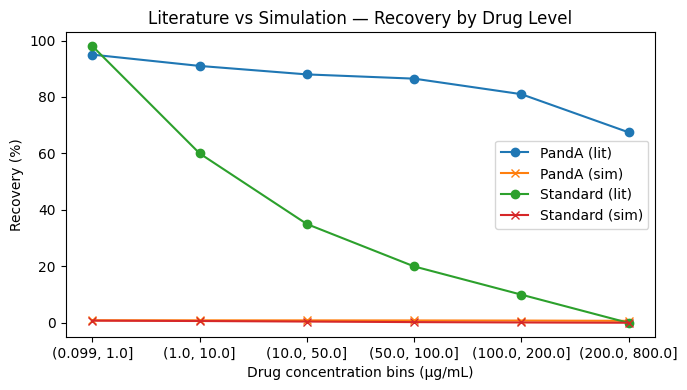

In [18]:
# Load literature benchmarks (from notebook 01)
lit = pd.read_parquet(HARM)
print("Lit rows:", lit.shape)

# Load simulated recovery from ada-panda-mini (CSV exports)
sim = load_sim_recovery(SIM_REPORTS)

if sim.empty:
    print("No sim recovery files found.")
    print("➡ Export recovery_standard.csv and recovery_panda.csv from ada-panda-mini into:", SIM_REPORTS)
else:
    comp = align_bins(lit, sim)
    
    # Save for notebook 03
    out_csv = ROOT / "reports" / "literature_vs_sim.csv"
    out_csv.parent.mkdir(parents=True, exist_ok=True)
    comp.to_csv(out_csv, index=False)
    print("Wrote:", out_csv)

    # Plot: literature vs sim per method
    fig, ax = plt.subplots(figsize=(7, 4))
    for method in comp["assay_method"].unique():
        sub_lit = comp[(comp["assay_method"] == method) & (comp["source"] == "literature")]
        sub_sim = comp[(comp["assay_method"] == method) & (comp["source"] == "simulation")]
        ax.plot(sub_lit["bin"].astype(str), sub_lit["recovery_pct"], marker="o", label=f"{method} (lit)")
        ax.plot(sub_sim["bin"].astype(str), sub_sim["recovery_pct"], marker="x", label=f"{method} (sim)")

    ax.set_xlabel("Drug concentration bins (µg/mL)")
    ax.set_ylabel("Recovery (%)")
    ax.set_title("Literature vs Simulation — Recovery by Drug Level")
    ax.legend()
    fig.tight_layout()

    fig_path = ROOT / "reports" / "figures" / "comparison_bars.png"
    fig_path.parent.mkdir(parents=True, exist_ok=True)
    fig.savefig(fig_path, dpi=150)
    print("Saved figure:", fig_path)